In [15]:
import pandas as pd
df = pd.read_table('data/clustered.tsv', index_col=['id'])
df['answerCount'] = df.pop('profileInfo.ugcSummary.answerCount')
df['reviewCount'] = df.pop('profileInfo.ugcSummary.reviewCount')

In [14]:
df[df.columns[5:]].head()

,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,...,translation.reviewText,translation.reviewTitle,product_name,material,n_masks,brand,product_price,dayofweek,hour,label_id
id,,,,,,,,,,,,,,,,,,,,,
05c2b17e-c28d-4792-930d-27e787d8d4ad,en-US,2021-01-27 09:04:10.569000+00:00,103839,0.0,34.0,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,...,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,2,9,4.0
80e44af8-2edf-4b81-a80a-7e7888d03cc0,ru-RU,2021-02-07 00:56:39.055000+00:00,103839,0.0,37.0,50,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,...,The grandson really liked it. Comfortable mask.,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,6,0,8.0
9a76e047-21e4-4da3-8b50-9d2396519b6b,en-US,2021-02-06 21:40:02.886000+00:00,103839,0.0,3.0,40,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,...,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,5,21,6.0
2890ac54-8707-418e-be3e-8d46231e3672,ru-RU,2021-02-05 16:29:28.906000+00:00,103839,0.0,16.0,40,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,...,A thin mask that is pleasant to the body. I li...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,4,16,1.0
9db33354-0457-4efa-bc9c-b5f7ee0eff31,ru-RU,2021-02-05 09:43:42.367000+00:00,103839,0.0,19.0,50,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,...,Great mask! It suited me perfectly. There is a...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85,4,9,2.0


In [16]:
c_feats = ['label_id', 'languageCode', 'answerCount', 'reviewCount', 'dayofweek', 'hour']
clusters = df[c_feats].copy()

In [18]:
clusters['label_id'].value_counts()

5.0     481
1.0     437
4.0     415
2.0     409
3.0     401
6.0     383
11.0    350
0.0     314
7.0     306
8.0     249
9.0      11
10.0      3
Name: label_id, dtype: int64

In [22]:
clusters.loc[~clusters['languageCode'].isin(['en-US', 'ru-RU']), 'languageCode'] = 'other'

In [69]:
k = clusters[clusters['label_id'] == 10]
print(k['languageCode'].value_counts(normalize=True))
k.drop(['label_id'], axis=1)

other    0.666667
en-US    0.333333
Name: languageCode, dtype: float64


,languageCode,answerCount,reviewCount,dayofweek,hour
id,,,,,
3e9267e7-01c0-45f2-8621-0253d4dbbbcd,other,0.0,8087.0,5,17
7b25a873-8f4c-41c9-9d87-a722785dc80c,other,0.0,8087.0,5,17
a83fffe2-e22e-4625-b440-699ae0b41d4f,en-US,0.0,8087.0,6,13


In [70]:
clusters.groupby('label_id')[['answerCount', 'reviewCount']].mean()

,answerCount,reviewCount
label_id,,
0.0,1.643312,49.585987
1.0,2.356979,81.322654
2.0,3.420538,86.696822
3.0,1.536160,71.531172
4.0,2.906024,83.385542
5.0,2.147609,65.742204
6.0,3.143603,64.853786
7.0,1.663399,89.173203
8.0,2.248996,42.433735


<AxesSubplot:xlabel='label_id', ylabel='ratingValue'>

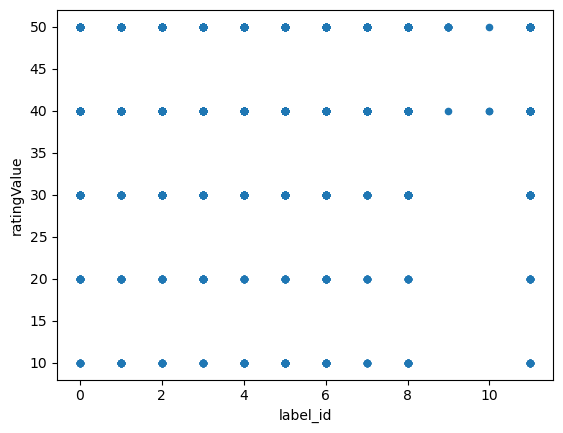

In [80]:
df.plot.scatter(y="ratingValue", x="label_id")

In [74]:
df.columns

Index(['abuseCount', 'customerNickname', 'helpfulNo', 'helpfulYes',
       'imagesCount', 'languageCode', 'postedDate', 'productId', 'ratingValue',
       'reviewText', 'reviewTitle', 'reviewed', 'score', 'languageCode.1',
       'translation.reviewText', 'translation.reviewTitle', 'product_name',
       'material', 'n_masks', 'brand', 'product_price', 'dayofweek', 'hour',
       'label_id', 'answerCount', 'reviewCount'],
      dtype='object')